Kernal: PUI2016_Python2

In [1]:
from __future__ import print_function
import pandas as pd 
import numpy as np
import pylab as pl
import os
import pep8
import scipy.stats as stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


#### Significance Threshold: $ \alpha $ = 0.05
#### Null Hypothesis: The average trip length for males is shorter than the average trip length for females.
#### Alternative Hypothesis: The average trip length for males is longer than or equal to the average trip length for females.

In [2]:
CUSP = "/gws/open/Student/citibike"

In [3]:
url = (CUSP+"/201707-citibike-tripdata.csv.zip")
print(url)

/gws/open/Student/citibike/201707-citibike-tripdata.csv.zip


In [4]:
data = pd.read_csv(url)
data.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,364,2017-07-01 00:00:00,2017-07-01 00:06:05,539,Metropolitan Ave & Bedford Ave,40.715348,-73.960241,3107,Bedford Ave & Nassau Ave,40.723117,-73.952123,14744,Subscriber,1986.0,1
1,2142,2017-07-01 00:00:03,2017-07-01 00:35:46,293,Lafayette St & E 8 St,40.730207,-73.991026,3425,2 Ave & E 104 St,40.789210,-73.943708,19587,Subscriber,1981.0,1
2,328,2017-07-01 00:00:08,2017-07-01 00:05:37,3242,Schermerhorn St & Court St,40.691029,-73.991834,3397,Court St & Nelson St,40.676395,-73.998699,27937,Subscriber,1984.0,2
3,2530,2017-07-01 00:00:11,2017-07-01 00:42:22,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398,Atlantic Ave & Furman St,40.691652,-73.999979,26066,Subscriber,1985.0,1
4,2534,2017-07-01 00:00:15,2017-07-01 00:42:29,2002,Wythe Ave & Metropolitan Ave,40.716887,-73.963198,398,Atlantic Ave & Furman St,40.691652,-73.999979,29408,Subscriber,1982.0,2


In [5]:
data['starttime'] = pd.to_datetime(data['starttime'])

In [6]:
data.drop(['stoptime', 'start station id',
           'start station name', 'start station latitude',
           'start station longitude', 'end station id', 'end station name',
           'end station latitude', 'end station longitude', 'bikeid',
           'usertype', 'birth year'], axis=1, inplace=True)

In [7]:
data.head()

,tripduration,starttime,gender
0,364,2017-07-01 00:00:00,1
1,2142,2017-07-01 00:00:03,1
2,328,2017-07-01 00:00:08,2
3,2530,2017-07-01 00:00:11,1
4,2534,2017-07-01 00:00:15,2


In [8]:
data.shape

(1735599, 3)

In [9]:
data['tripduration'] = data['tripduration'] / 60

In [10]:
data['starttime'] = data['starttime'].dt.date

In [11]:
data.head()

,tripduration,starttime,gender
0,6.066667,2017-07-01,1
1,35.700000,2017-07-01,1
2,5.466667,2017-07-01,2
3,42.166667,2017-07-01,1
4,42.233333,2017-07-01,2


In [12]:
female_df = data[data.gender == 2]
female_df = female_df.groupby('starttime').mean()
female_df.drop(['gender'], axis=1, inplace=True)
female_df.columns = ['Average Female Trip Duration']
female_df.head(10)

,Average Female Trip Duration
starttime,
2017-07-01,21.782166
2017-07-02,24.100578
2017-07-03,19.129823
2017-07-04,19.975015
2017-07-05,18.953602
2017-07-06,16.465340
2017-07-07,14.734951
2017-07-08,17.335252
2017-07-09,19.346256


In [13]:
male_df = data[data.gender == 1]
male_df = male_df.groupby('starttime').mean()
male_df.drop(['gender'], axis=1, inplace=True)
male_df.columns = ['Average Male Trip Duration']
male_df.head(10)

,Average Male Trip Duration
starttime,
2017-07-01,18.111268
2017-07-02,20.141165
2017-07-03,18.276041
2017-07-04,22.380926
2017-07-05,15.635412
2017-07-06,15.280398
2017-07-07,13.839599
2017-07-08,18.146678
2017-07-09,16.705310


In [14]:
both = pd.concat([female_df, male_df], axis=1)
both.head(10)

,Average Female Trip Duration,Average Male Trip Duration
starttime,,
2017-07-01,21.782166,18.111268
2017-07-02,24.100578,20.141165
2017-07-03,19.129823,18.276041
2017-07-04,19.975015,22.380926
2017-07-05,18.953602,15.635412
2017-07-06,16.465340,15.280398
2017-07-07,14.734951,13.839599
2017-07-08,17.335252,18.146678
2017-07-09,19.346256,16.705310


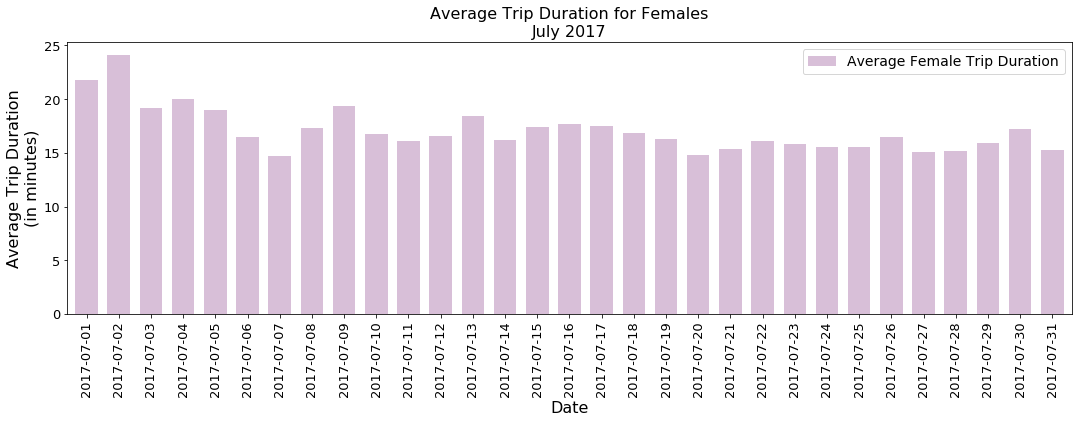

In [15]:
ax1 = female_df.plot(kind='bar', figsize=(18, 5), color='thistle',
                     fontsize='13', width=0.7)
ax1.set_xlabel('Date', fontsize='16')
ax1.set_ylabel('Average Trip Duration\n(in minutes)', fontsize='16')
ax1.set_title("Average Trip Duration for Females\nJuly 2017", fontsize='16')
ax1.legend(fontsize="14")

### Fig 1: Average trip length of female riders per day in July 2017. 

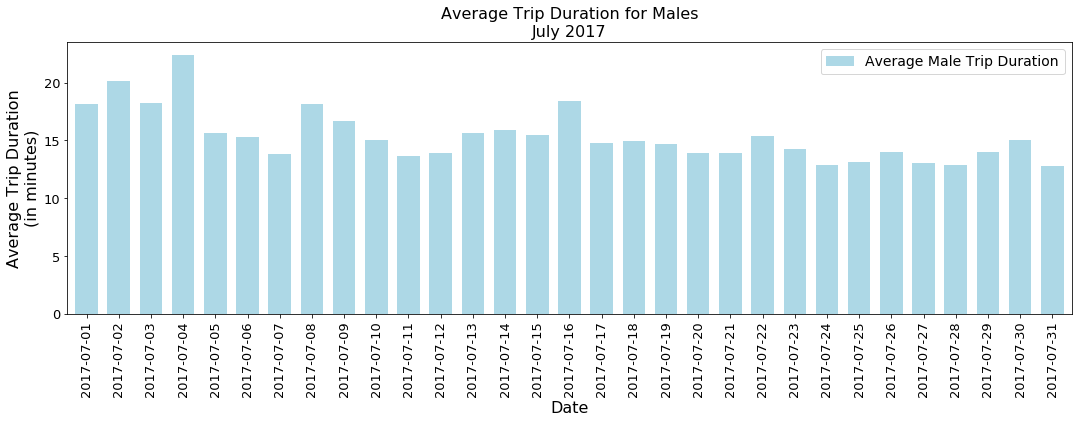

In [16]:
ax2 = male_df.plot(kind='bar', figsize=(18, 5),
                   color='lightblue', fontsize='13', width=0.7)
ax2.set_xlabel('Date', fontsize='16')
ax2.set_ylabel('Average Trip Duration\n(in minutes)', fontsize='16')
ax2.set_title("Average Trip Duration for Males\nJuly 2017", fontsize='16')
ax2.legend(fontsize="14")

### Fig 2: Average trip length of male riders per day in July 2017.

In [17]:
combined = pd.concat([male_df, female_df], axis=1)
combined.head()

,Average Male Trip Duration,Average Female Trip Duration
starttime,,
2017-07-01,18.111268,21.782166
2017-07-02,20.141165,24.100578
2017-07-03,18.276041,19.129823
2017-07-04,22.380926,19.975015
2017-07-05,15.635412,18.953602


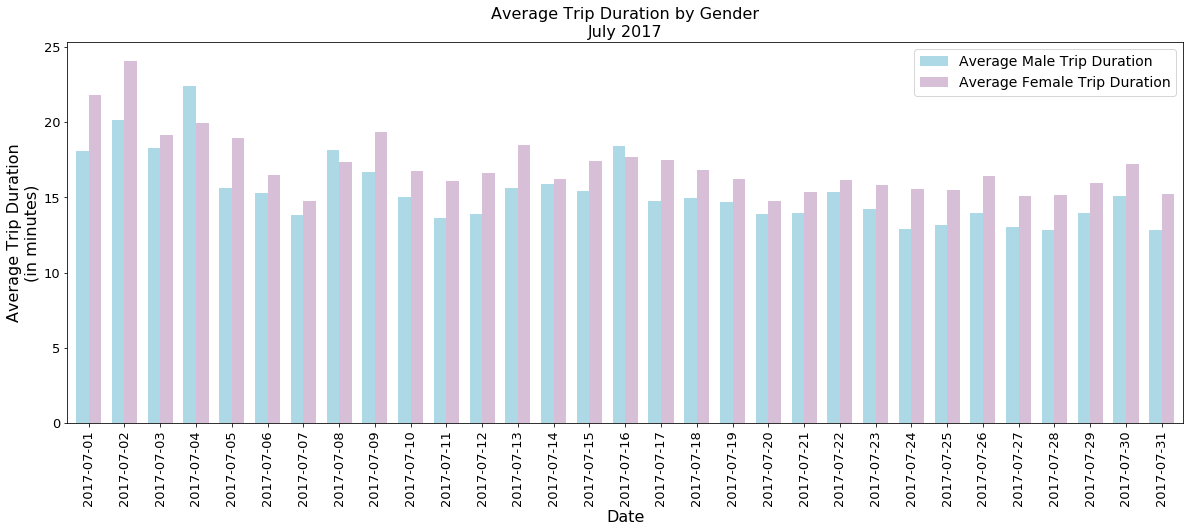

In [18]:
ax3 = combined.plot(kind='bar', figsize=(20, 7),
                    fontsize='13', width=0.7, color=('lightblue', 'thistle'))
ax3.set_xlabel('Date', fontsize='16')
ax3.set_ylabel('Average Trip Duration\n(in minutes)', fontsize='16')
ax3.set_title("Average Trip Duration by Gender\nJuly 2017", fontsize='16')
ax3.legend(fontsize="14")

### Fig 3: Comparison of male and female average trip durations in July 2017. This plot shows that overall, women take longer trips on average.

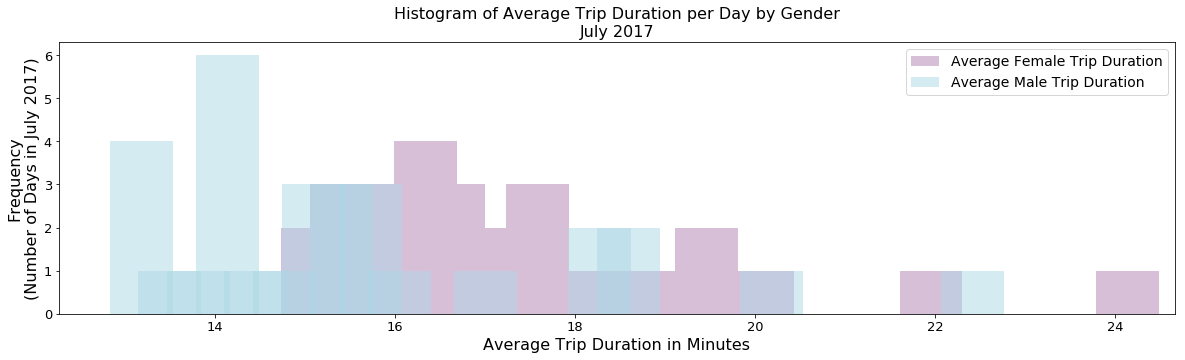

In [19]:
ax = female_df.plot(kind='hist', figsize=(20, 5), color='thistle',
                    fontsize='13', width=0.7, bins=30)
male_df.plot(ax=ax, kind='hist', color='lightblue', fontsize='13',
             width=0.7, alpha=0.5, bins=30)
ax.set_title("Histogram of Average Trip Duration per Day by Gender\nJuly 2017",
             fontsize='16')
ax.set_xlabel('Average Trip Duration in Minutes', fontsize='16')
ax.set_ylabel('Frequency\n(Number of Days in July 2017)', fontsize='16')
ax.legend(fontsize="14")

### Fig 4. Histogram showing average male and female trip durations in July 2017.

## Statistical Tests

In [20]:
female_df.describe()

,Average Female Trip Duration
count,31.000000
mean,17.093857
std,2.096811
min,14.734951
25%,15.716917
50%,16.465340
75%,17.564824
max,24.100578


In [21]:
male_df.describe()

,Average Male Trip Duration
count,31.000000
mean,15.356587
std,2.271954
min,12.826346
25%,13.902359
50%,14.927783
75%,15.765576
max,22.380926


In [22]:
female_mean = female_df['Average Female Trip Duration'].mean()
male_mean = male_df['Average Male Trip Duration'].mean()
female_std = female_df['Average Female Trip Duration'].std()
male_std = male_df['Average Male Trip Duration'].std()
mean_difference = female_mean - male_mean

In [23]:
print("Female Mean:", female_mean, "\n"
      "Male mean:", male_mean, "\n"
      "Female Standard Deviation:", female_std, "\n"
      "Male Standard Deviation:", male_std, "\n"
      "Mean Difference:", mean_difference, "\n")

Female Mean: 17.0938571666 
Male mean: 15.3565871189 
Female Standard Deviation: 2.09681081439 
Male Standard Deviation: 2.27195409054 
Mean Difference: 1.73727004769 



#### Z Test

In [24]:
mean_difference / male_std
ztest = (mean_difference) / (male_std / np.sqrt(31))
ztest

4.2574408965527297

#### Two Sample T Statistic 
Suggested here: https://github.com/scheids1/PUI2017_rls672/blob/master/HW3_rls672/CitibikeReview_gc2300.md

Scipy Documentation: https://docs.scipy.org/doc/scipy-0.19.1/reference/generated/scipy.stats.ttest_ind.html

In [25]:
stats.ttest_ind(female_df, male_df)

Ttest_indResult(statistic=array([ 3.12864137]), pvalue=array([ 0.00271001]))